# Project: Machine Learning - Identify Fraud from Enron Email


## Table of Contents

- [Introduction](#intro)
    * [Objectives Definition](#objDef)
    * [Configuration](#PyConf)
- [Data Wrangling](#wrangling)
    * [Data Acquisition](#DW_DA)
    * [Data Cleaning](#DW_DC)
- [Exploratory Data Analysis](#eda)
    * [Objectives Revision](#DE_OB)
    * [Analysis Results & Data Visualization](#DW_AR)
- [Analysis Limitations](#limitations)
- [Analysis Conclusions](#conclusions)


## Introduction<a id='intro'></a>



---

### Objectives Definition<a id='objDef'></a>  

---

### Configuration<a id='PyConf'></a> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<button name="button"><a href="#intro"><span style="color:black">Up</span></a></button>

The following python packages and functions were used along this report:

In [657]:
### Load python Functions
%load_ext autoreload
%autoreload 1
%aimport tester
%aimport poi_id
%aimport Data_Cleaning_Functions


### Import all packages that will be later on needed
import sys
import pickle
import pprint
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, SelectPercentile, chi2
from scipy import stats
from textwrap import wrap

### Import additional functions
sys.path.append("data/")
sys.path.append("tools/")
%aimport feature_format

### shows plots directly in the notebook
%matplotlib notebook

### Generates a watermark with the version of python used to build this analysis
%load_ext watermark
%watermark

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
2020-12-29T20:32:40+01:00

CPython 3.7.7
IPython 7.14.0

compiler   : MSC v.1916 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 158 Stepping 13, GenuineIntel
CPU cores  : 8
interpreter: 64bit


## Data Wrangling<a id='wrangling'></a>

---

<button name="button"><a href="#DW_DA"><span style="color:blue">Data Acquisition</span></a></button><button name="button"><a href="#DW_DC"><span style="color:blue">Data Cleaning</span></a></button><button name="button"><a href="#DW_PM"><span style="color:blue">Map Issues</span></a></button><button name="button"><a href="#DW_CSV"><span style="color:blue">CSV Export</span></a></button> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<button name="button"><a href="#intro"><span style="color:red">Back to Introduction</span></a></button> <button name="button"><a href="#eda"><span style="color:black">Forward to Data Exploration</span></a></button> <button name="button"><a href="#conclusions"><span style="color:black">Forward to Conclusions</span></a></button>

---

---

### Data Adquisition <a name="DW_DA"></a> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<button name="button"><a href="#wrangling"><span style="color:black">Up</span></a></button>

For this study, it was used the data about Enron company provided during the Udacity's Data Analyst NanoDegree course. Such data contained the following information:

- "final_project_dataset.pkl" --> A pickle file containing a Dictionary where the keys were the names of people related to the Enron case and the values were another Dictionary containing the following information:
    * bonus
    * deferral_payments
    * deferred_income
    * director_fees
    * email_address
    * exercised_stock_options
    * expenses
    * from_messages
    * from_poi_to_this_person
    * from_this_person_to_poi
    * loan_advances
    * long_term_incentive
    * other
    * poi
    * restricted_stock
    * restricted_stock_deferred
    * salary
    * shared_receipt_with_poi
    * to_messages
    * total_payments
    * total_stock_value
- "poi_names.txt" --> A text file containing a list with the names of people that were considered "Person of Interest (poi)"
- "maildir" --> A dictory containing emails from several people related to the Enron case.

---

### Data Cleaning <a name="DW_DC"></a> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<button name="button"><a href="#wrangling"><span style="color:black">Up</span></a></button>

The cleaning process was mainly focused on selecting the most interesting data and features for our analysis according to the [objectives](#objDef) defined before, identifying the possible presence of outliers and NaN values that could affect to the conclusions.

In order to have a first look at the data, a scatter matrix was plotted for having a first feeling of the shape of the data and possible correlations between the different features as well as the issues we may found (i.e. outliers). Note that the "email_address" information was not used as it was not considered a feature.

In [658]:
### Define all features of Enron's people
features_list = ['poi','bonus','deferral_payments','deferred_income','director_fees','exercised_stock_options',
                 'expenses','from_messages','from_poi_to_this_person','from_this_person_to_poi','loan_advances',
                 'long_term_incentive','other','restricted_stock','restricted_stock_deferred','salary',
                 'shared_receipt_with_poi','to_messages','total_payments','total_stock_value'] 
### Load the corresponding Data with no modification   
data = Data_Cleaning_Functions.loadData(features_list,total_removal=False,nanFlag=False)

Data succesfully loaded.


<IPython.core.display.Javascript object>


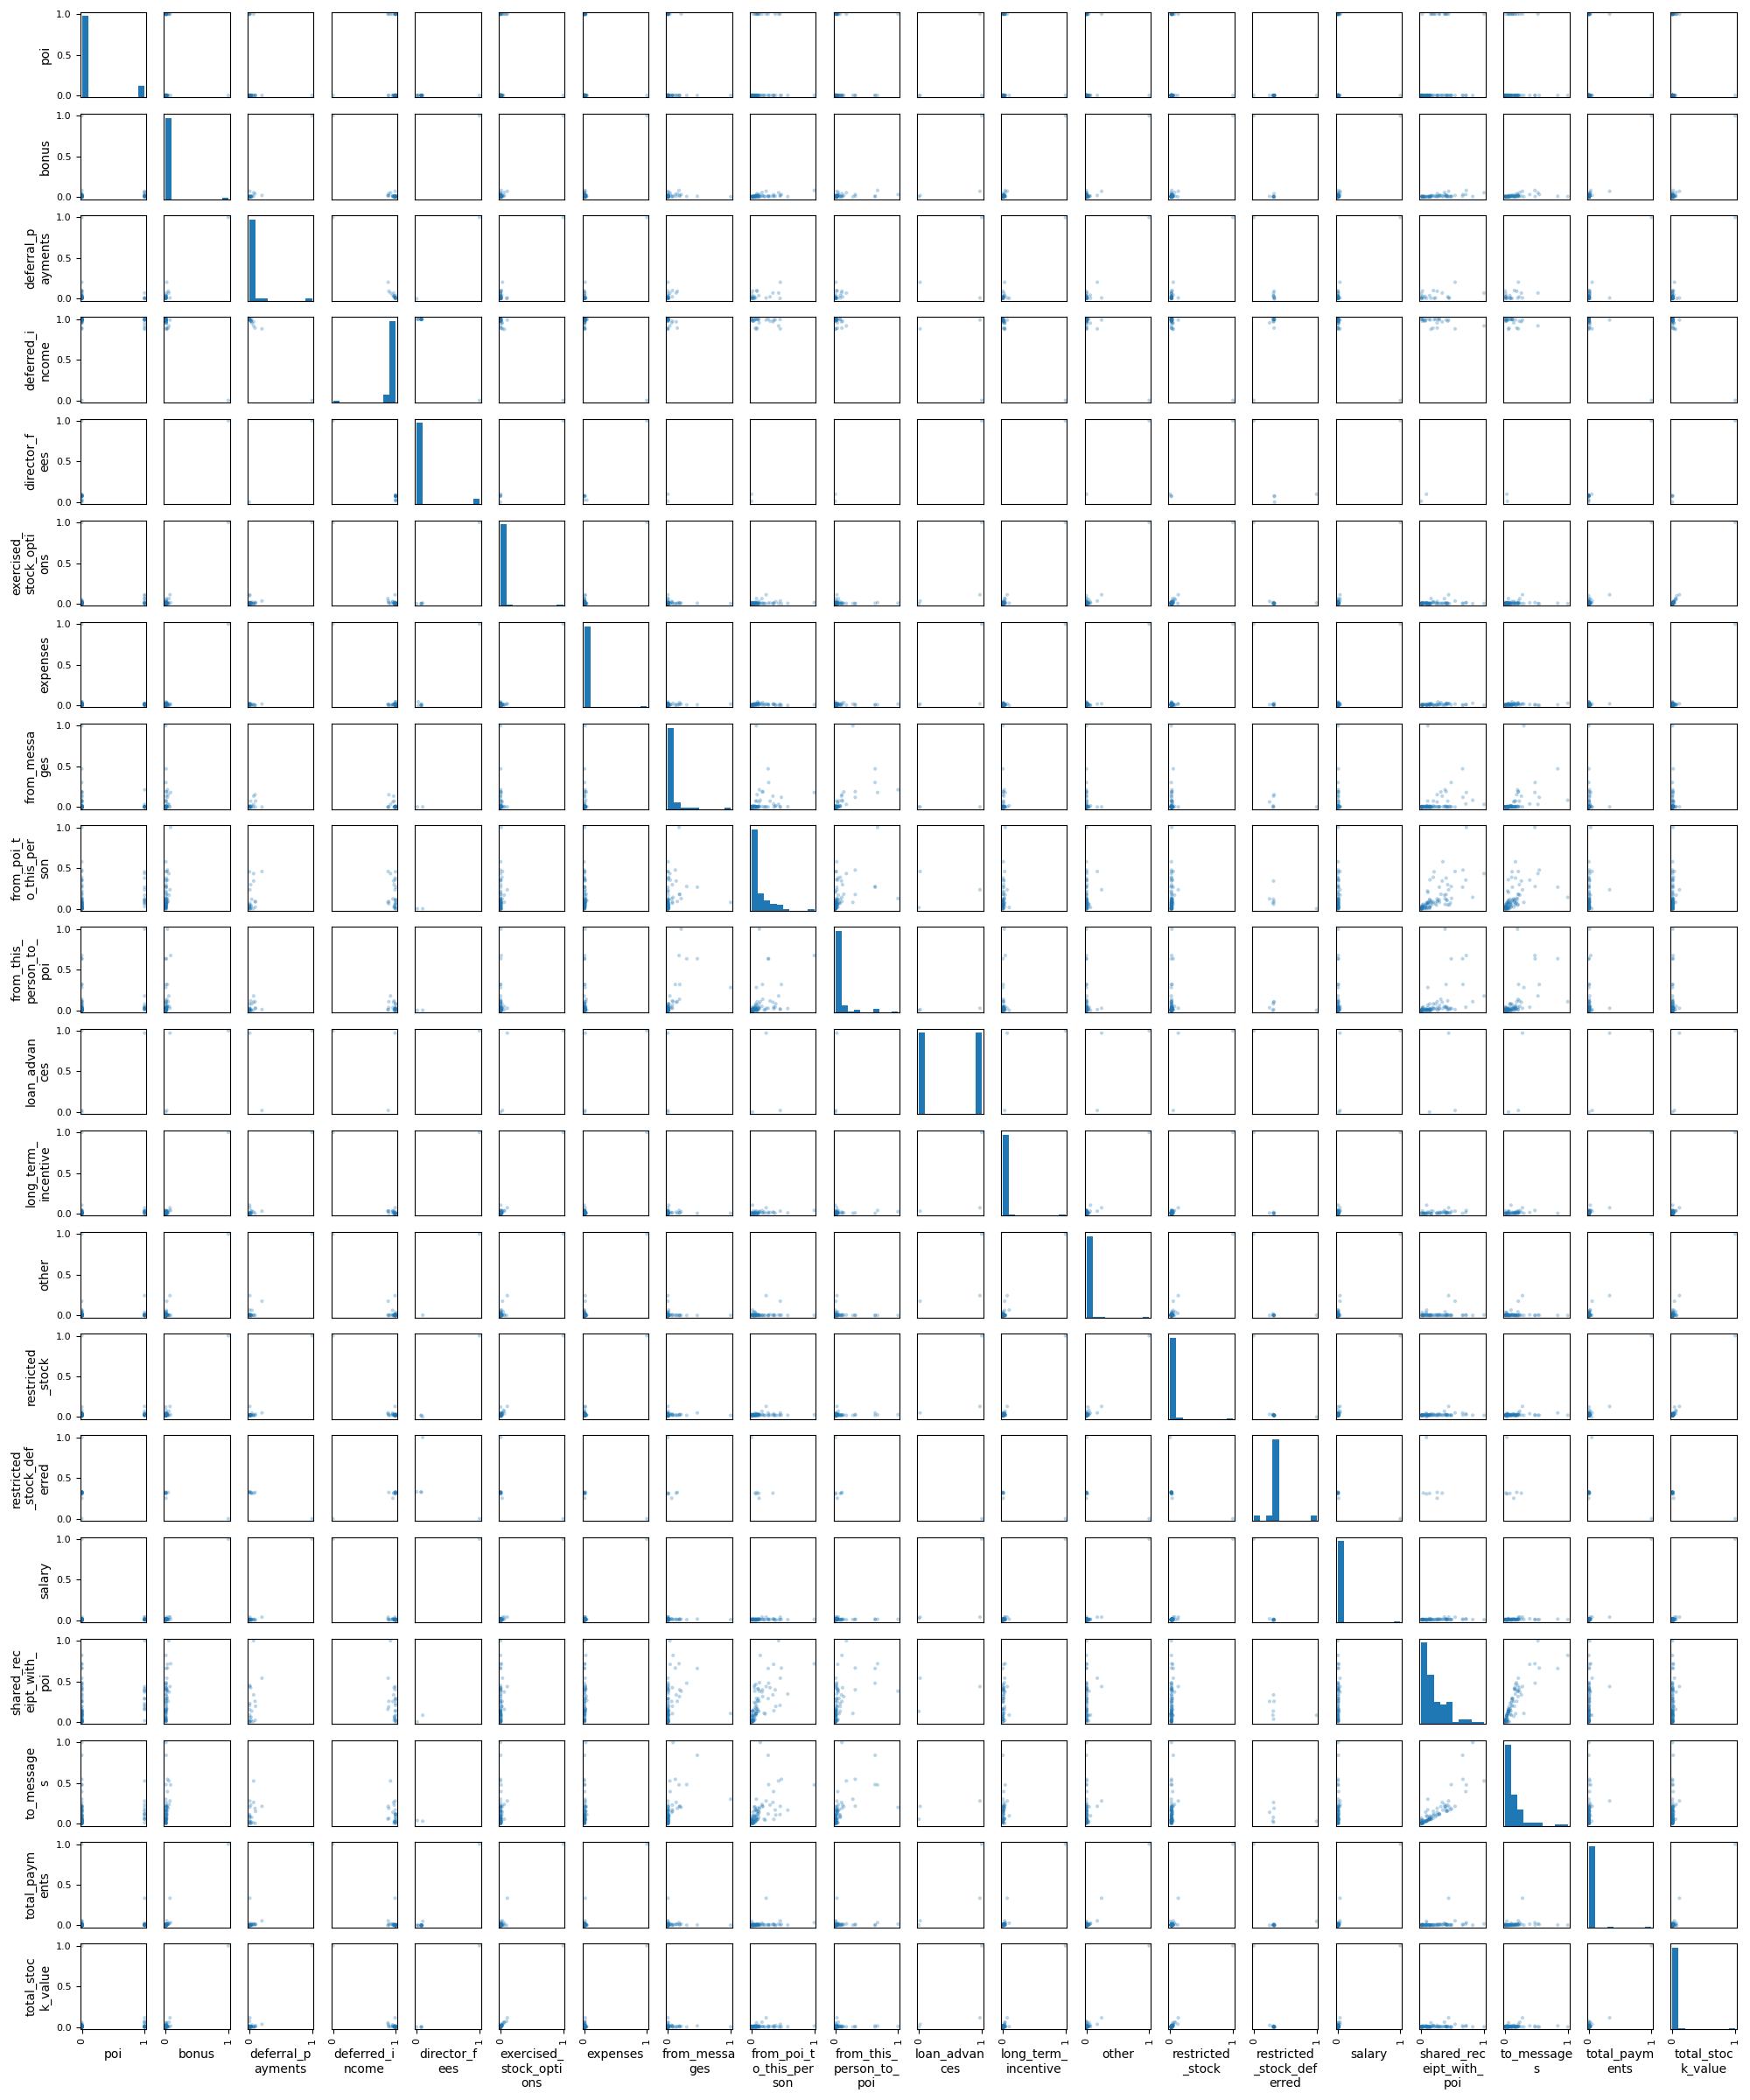

In [659]:
### Represent a scatter matrix for the selected features
Data_Cleaning_Functions.plot_scatter_matrix(data,"maxmin",features_list)

The first thing that gives the attention on this figure is that in most of the scatter plots there seem to be a big difference between some few cases and the majority of the data. The reason of such behaviour was the presence of a "Total" sum entry, as it was found during the Nanodegree course. Therefore, such "TOTAL" entry was disregarded and the scatter matrix was generated again with the rest of data:

In [660]:
### Load the corresponding Data removing the TOTAL entry 
data = Data_Cleaning_Functions.loadData(features_list,total_removal=True,nanFlag=False)

Data succesfully loaded.


<IPython.core.display.Javascript object>


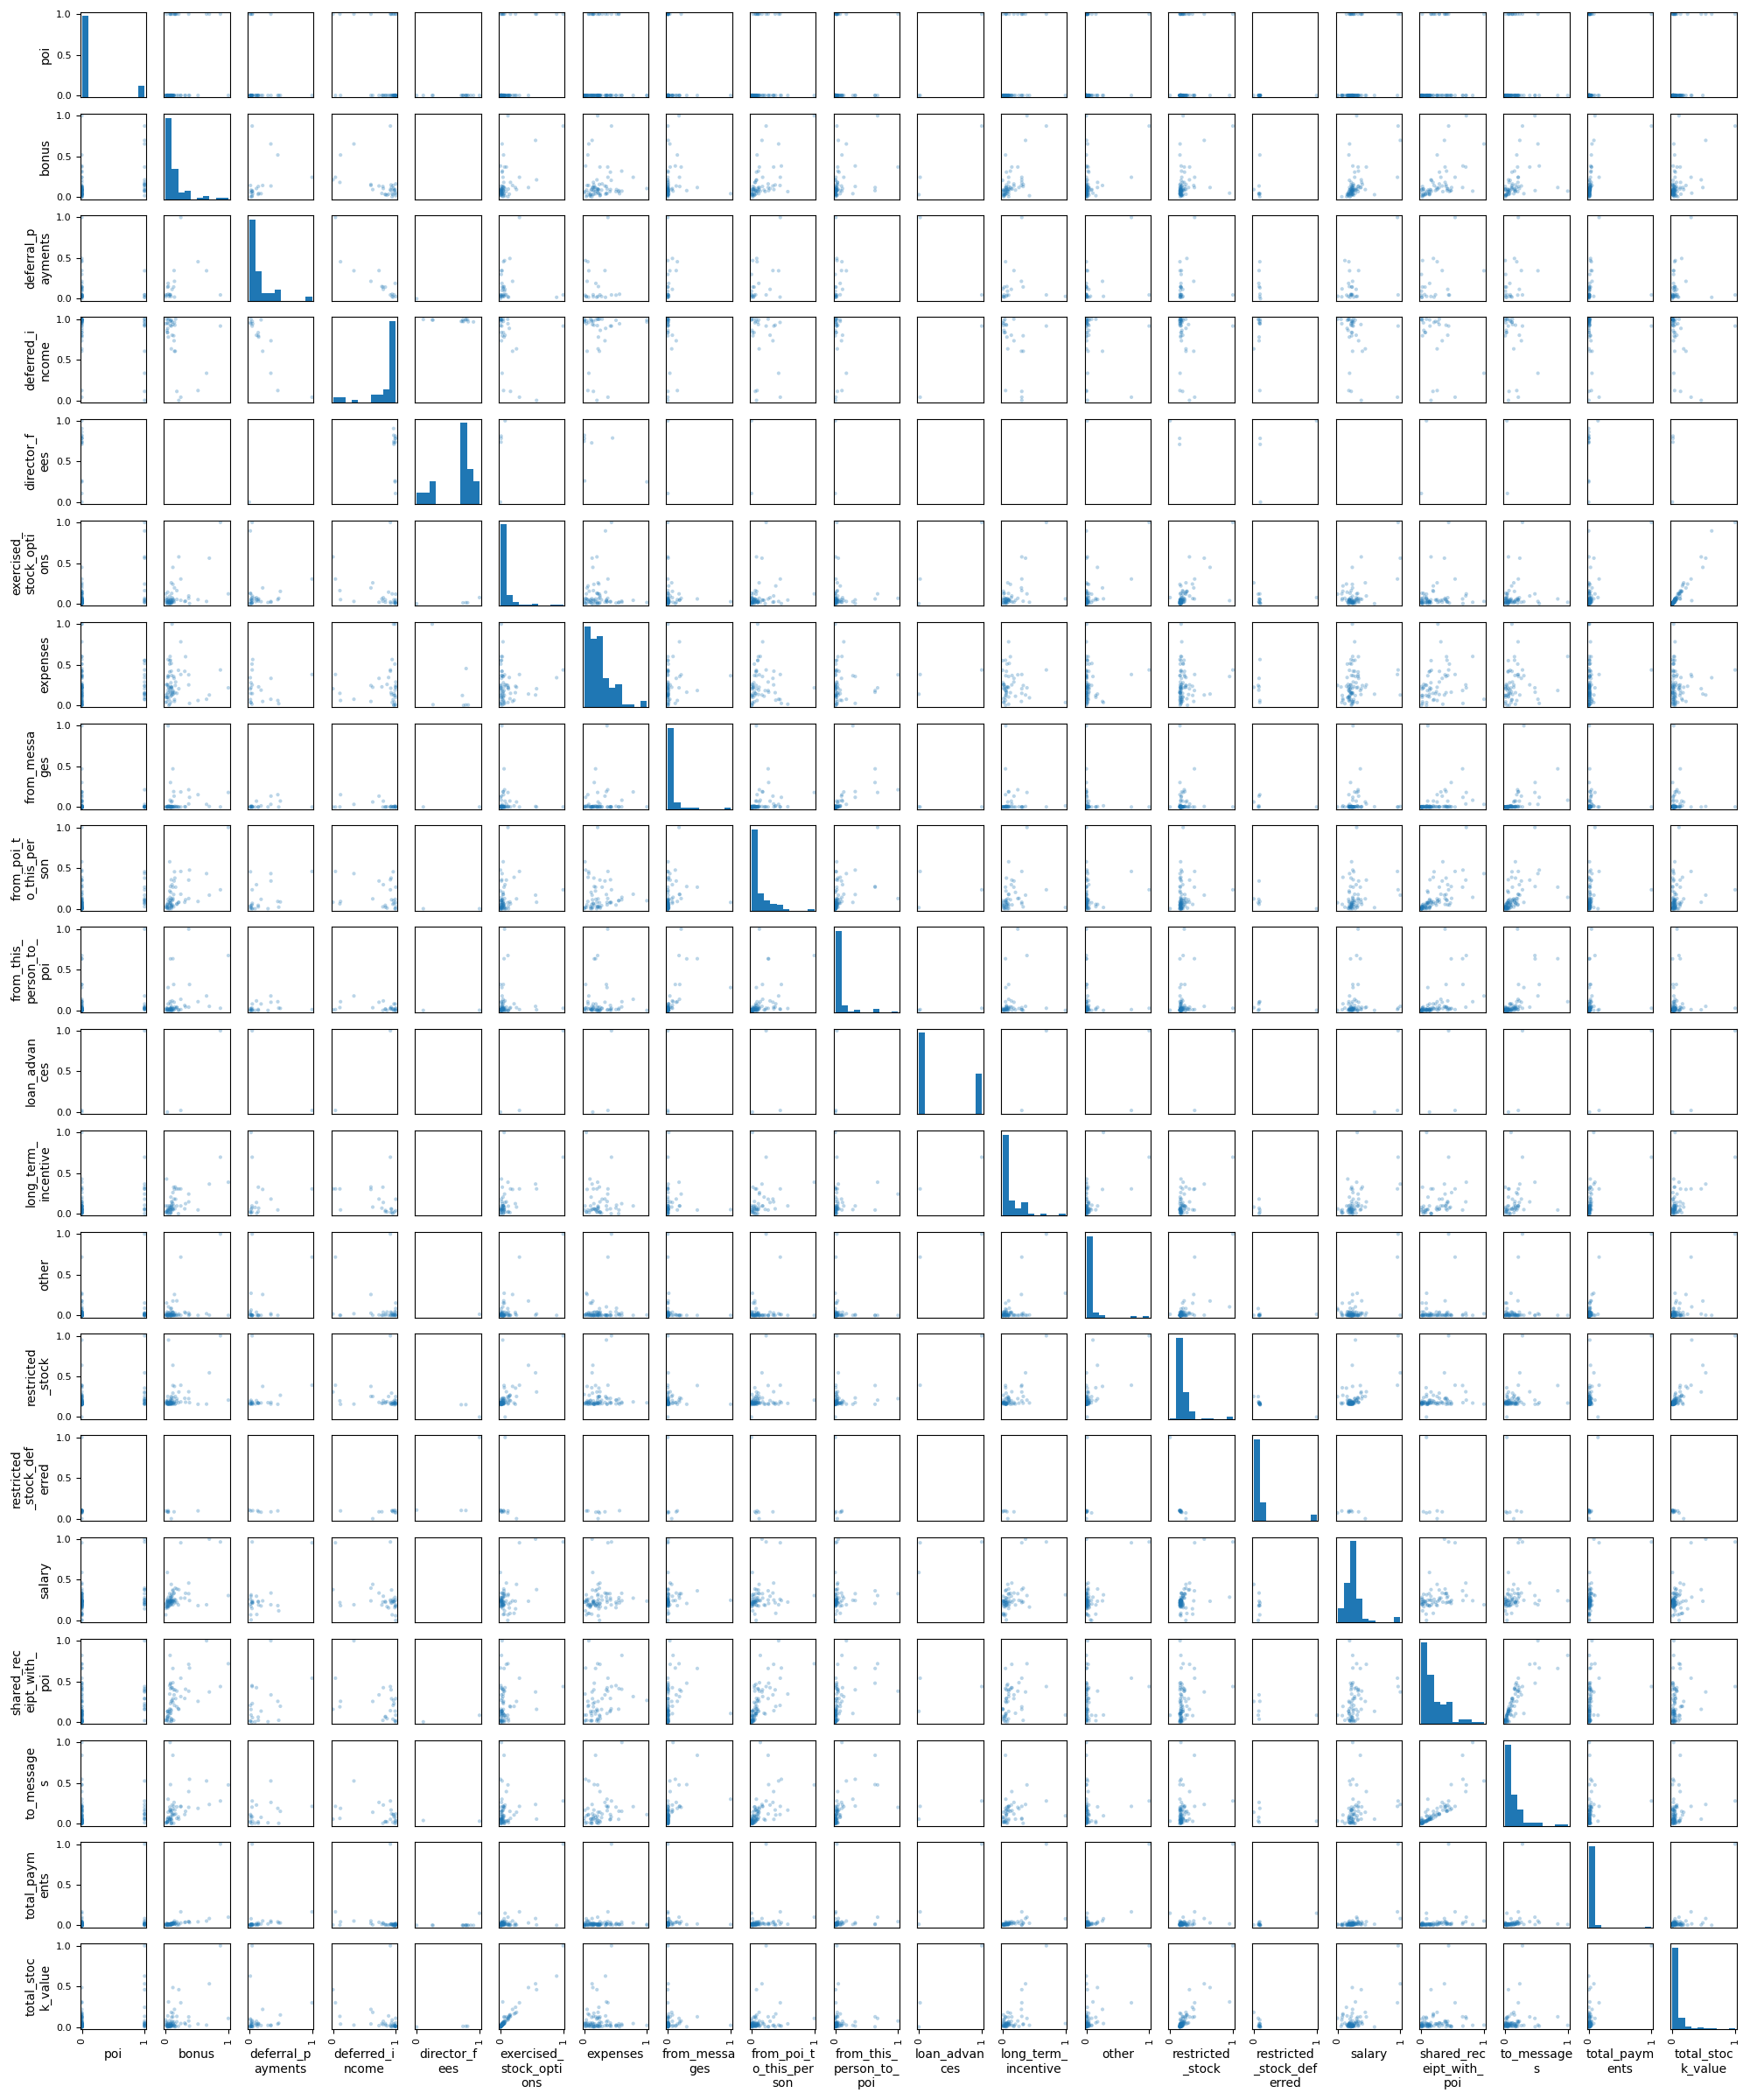

In [661]:
### Represent a scatter matrix for the selected features
Data_Cleaning_Functions.plot_scatter_matrix(data,"maxmin",features_list)

In this new figure, the ranges of the data look more reasonable but it is still observed a big difference between the number of points available for each feature, thus indicating the presence of NaN values.    
Taking advantadge of "missingno" package, the presence of NaN values was represented in the following figure:

<IPython.core.display.Javascript object>


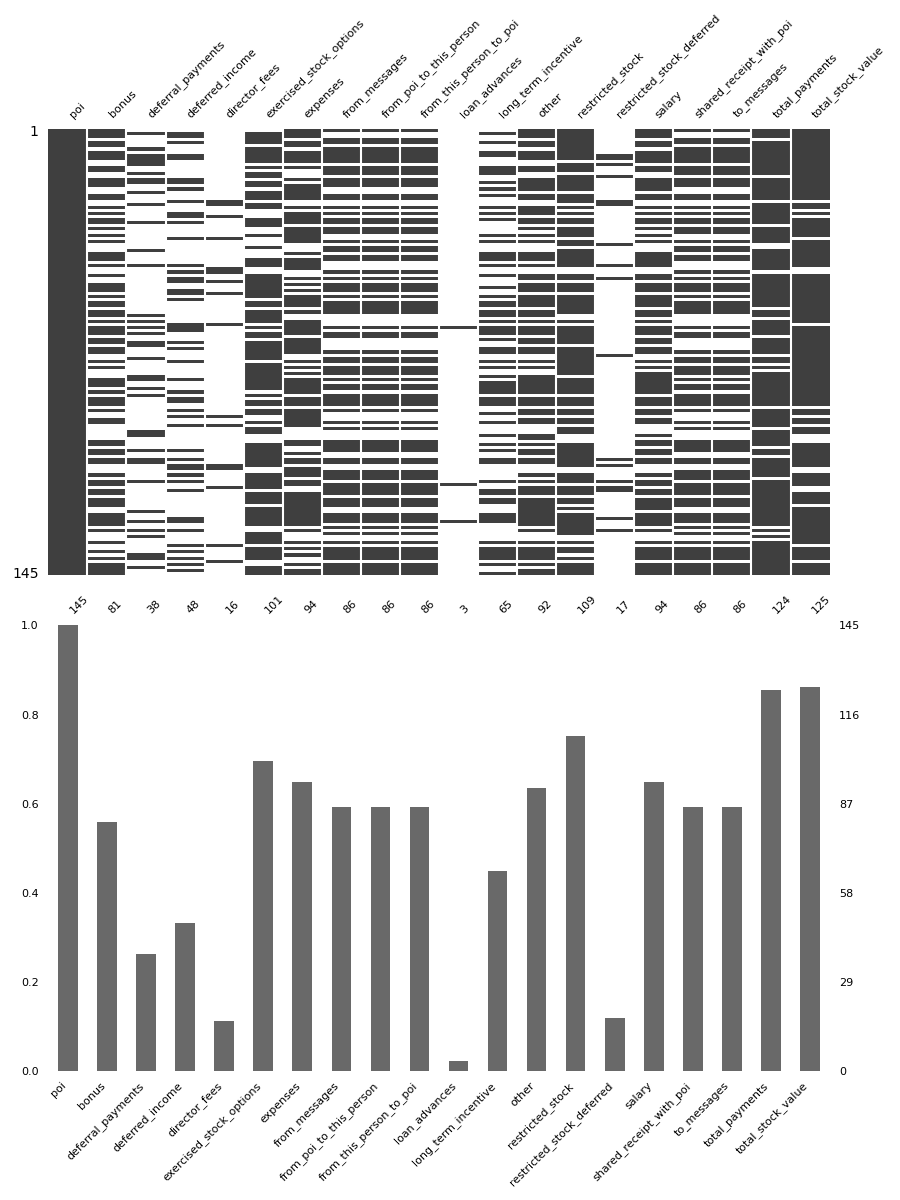

In [662]:
### Represent the amount of NaN values present for each feature
Data_Cleaning_Functions.show_NaN(data,features_list,nplots=2)

In this figure it is clearly seen that the amount of "NaN" values for some of the features (i.e. loan_advances) is huge and so, the information provided by such features will be very limited or even inconclusive. Therefore, it was decided to disregard those features which a ratio of "NaN" values higher than 70%. These discarded features were:

- deferral_payments: 73.8% of NaN values
- director_fees: 88.97% of NaN values
- loan_advances: 97.93% of NaN values
- restricted_stock_deferred: 88.28% of NaN values

Checking again the remaining data, several "NaN" values were still present in all columns (except "poi") that were managed case by case depending on the needs. It was also observed that some rows contained very few data and there was even one case with no data at all (except from "poi" column), which was also removed.

In [663]:
### Define features of Enron's people to be kept
features_list = ['poi','bonus','deferred_income','exercised_stock_options','expenses','from_messages',
                 'from_poi_to_this_person','from_this_person_to_poi','long_term_incentive','other',
                 'restricted_stock','salary','shared_receipt_with_poi','to_messages','total_payments','total_stock_value'] 
### Load the corresponding Data for the selected features 
data = Data_Cleaning_Functions.loadData(features_list,total_removal=True,nanFlag=False)

Data succesfully loaded.


<IPython.core.display.Javascript object>


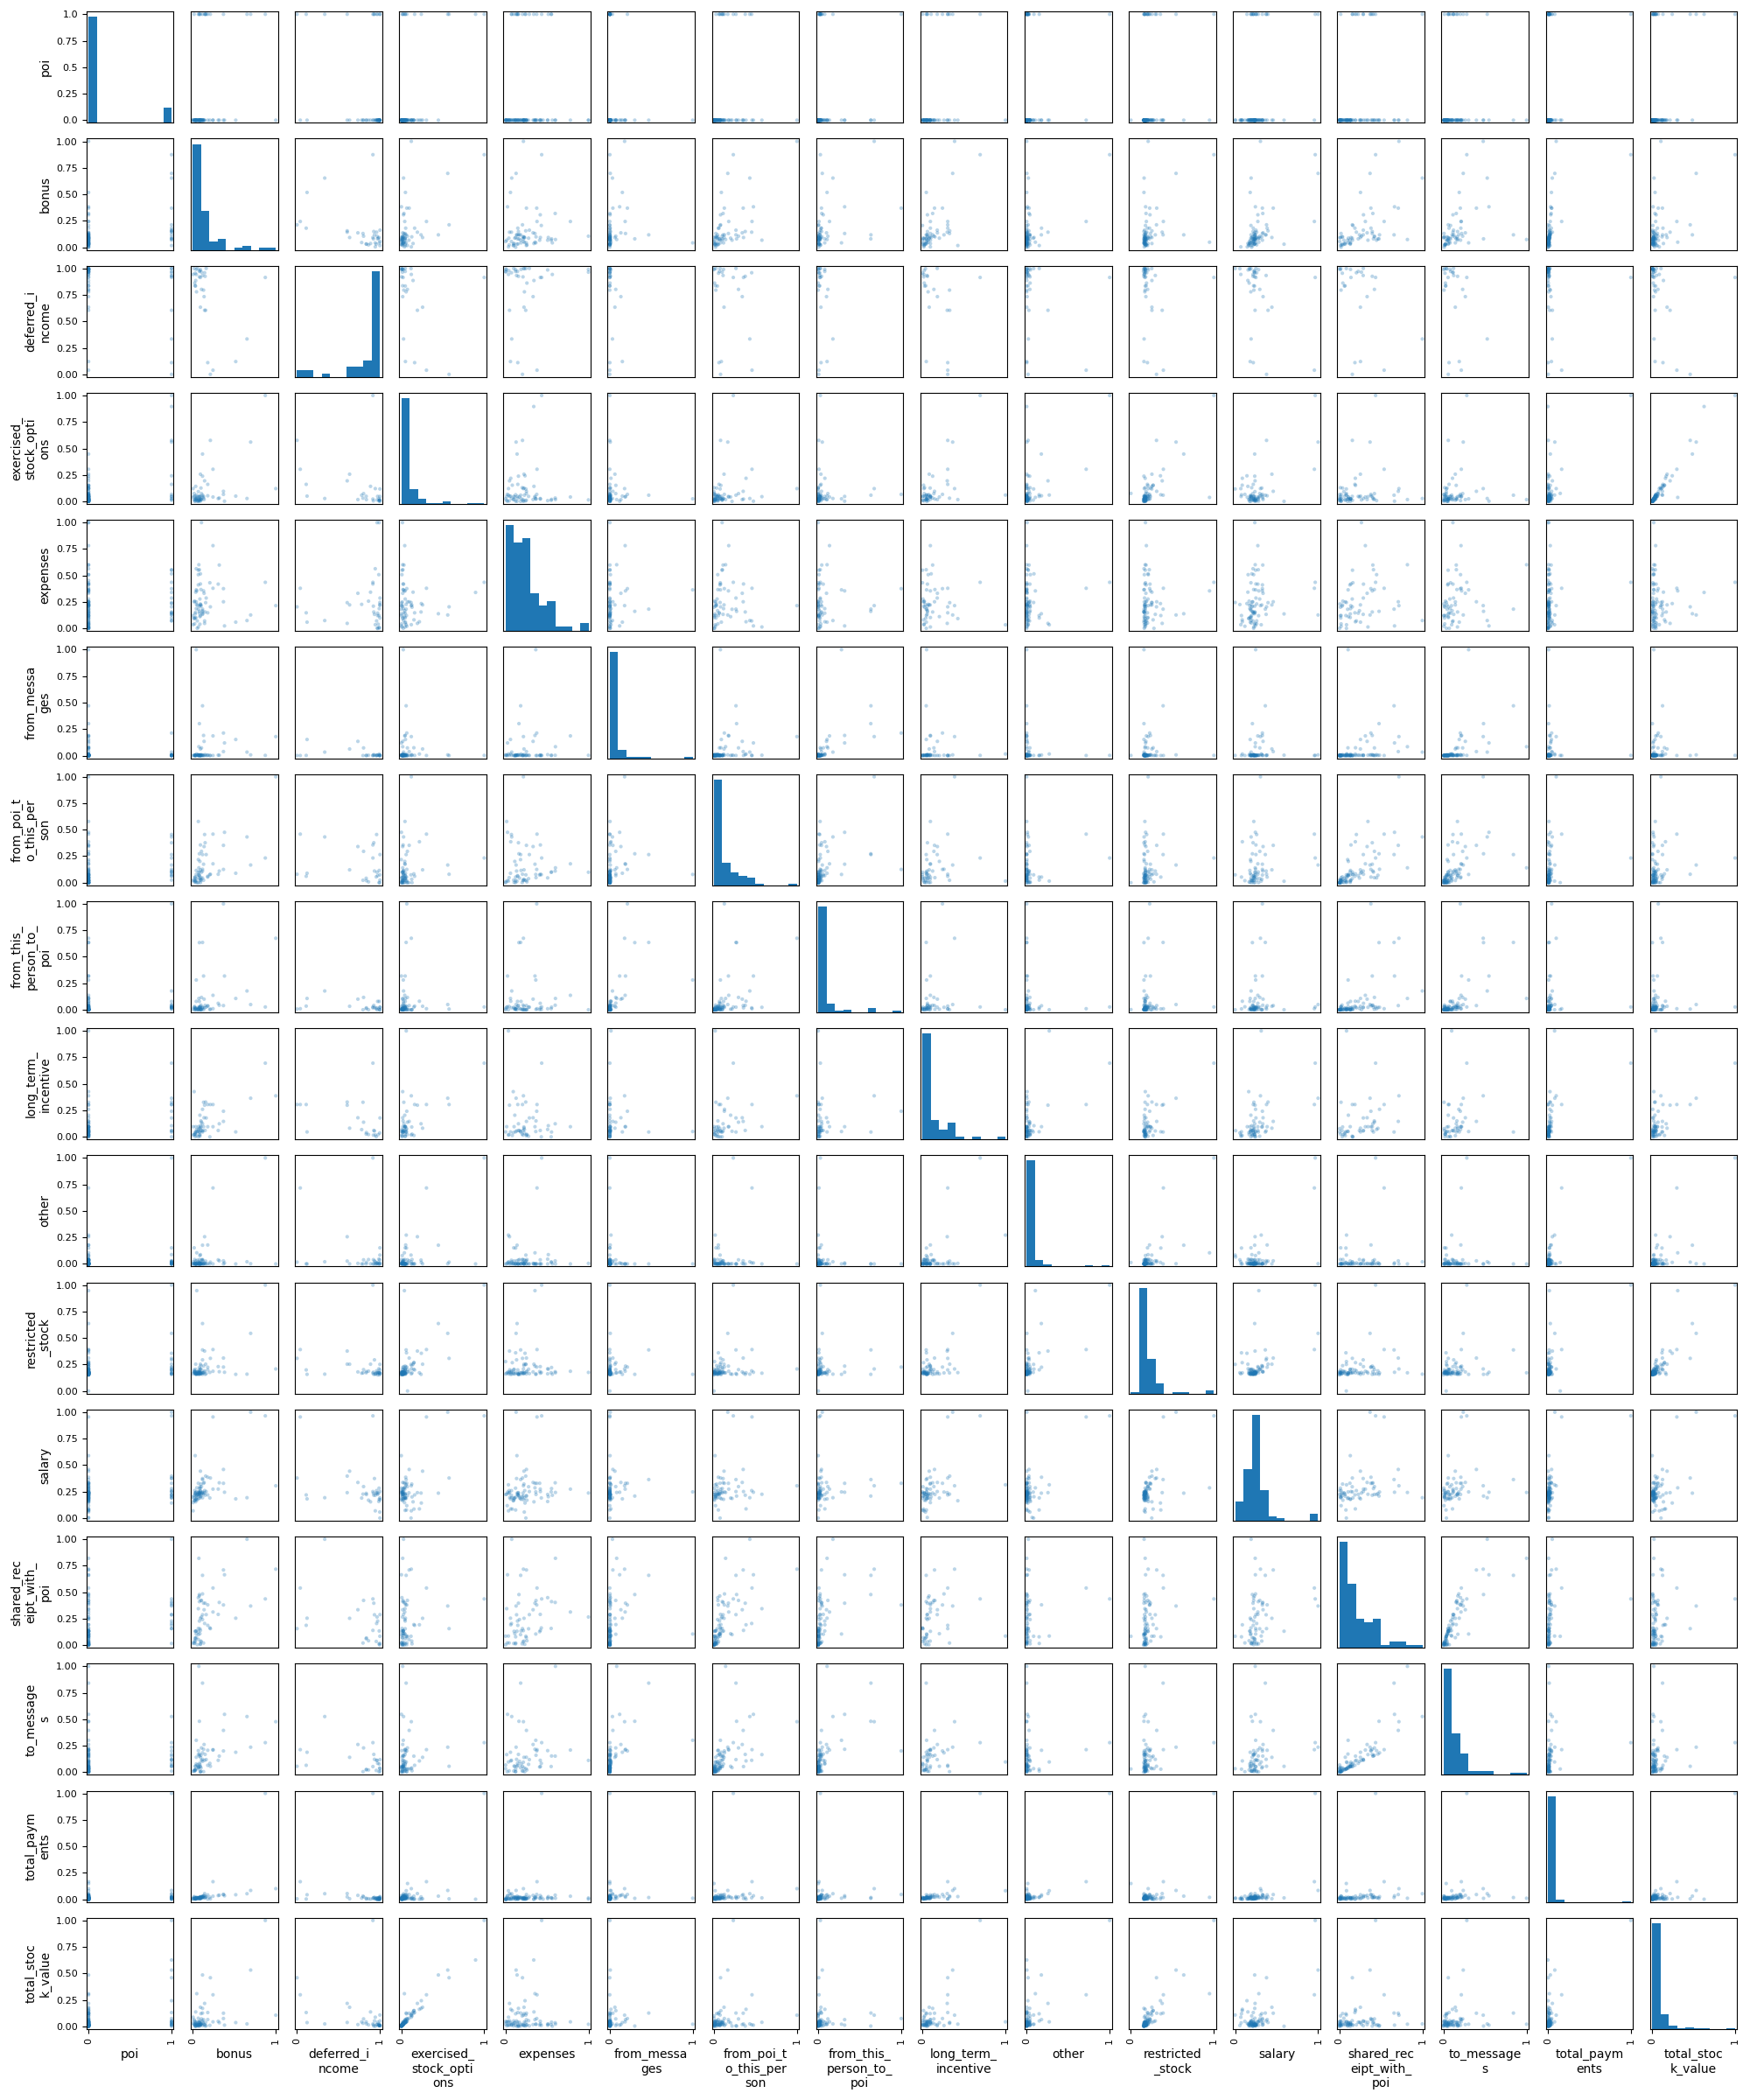

In [664]:
### Represent a scatter matrix for the selected features
Data_Cleaning_Functions.plot_scatter_matrix(data,"maxmin",features_list)

<IPython.core.display.Javascript object>


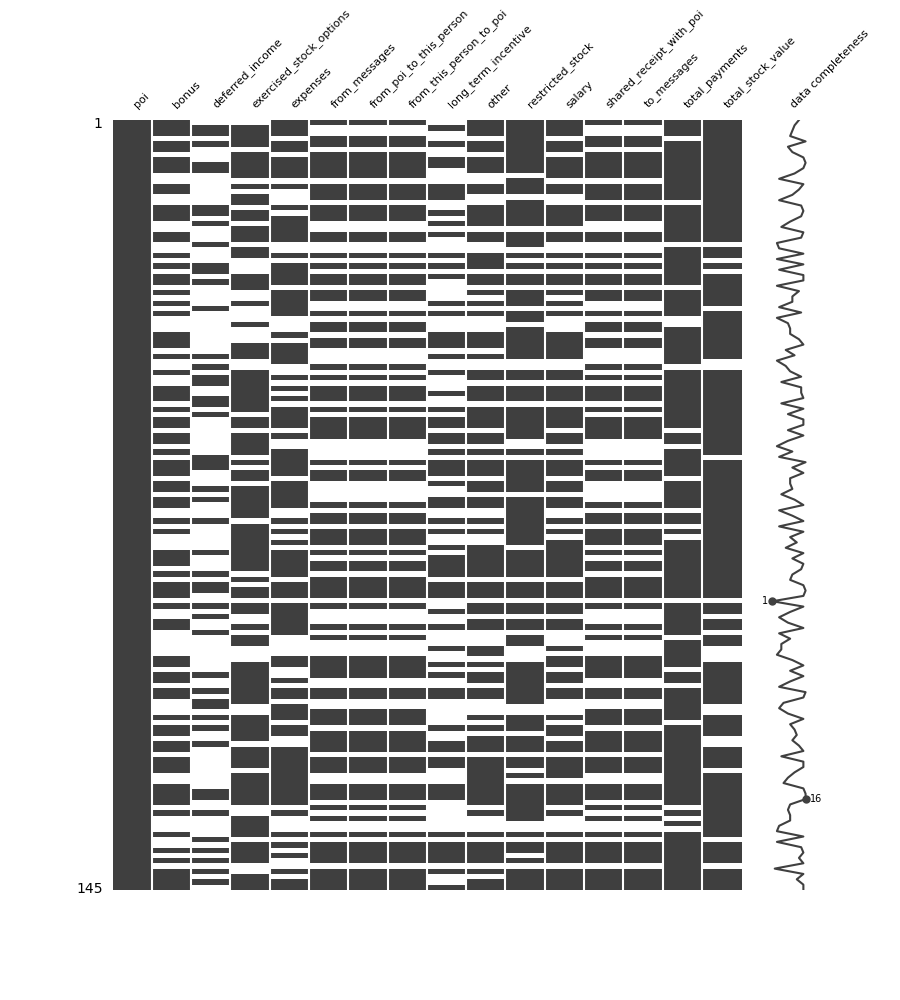

In [666]:
### Represent the amount of NaN values present for each feature>
Data_Cleaning_Functions.show_NaN(data,features_list,nplots=1)

In terms of the distributions of the data, the ranges of the data looked more reasonable now but there still were some points that significantly differed from the others which could be an indication of the presence of additional outliers.  

Apart from the outliers, in the scatter matrix before it was also observed that there were other features that seem to be significantly correlated to each other, thus indicating that the dimensionality of the study most likely could be reduced without a significant loss of information.

In order to determine which features are the most suitable for our analysis without a significant loss of information, an initial Principal Component Analysis study was conducted to make a first selection of the most interesting features for our analysis. For that, the remaining outliers and NaN values were managed as follows:

- In terms of outliers, at this initial stage of the analysis, it was decided to use a common criteria based on the z-score of the sample values and the probability for such value to happen. In this case, it was considered as an outlier those values whose z-score was higher than 3 times the standard deviation (less than 0.13% probability).  
Note that using this kind of criteria some assumptions are being made in terms of the normality of the data considering that the distribution of each feature follow a normal distribution. Looking at the histograms of the scatter matrix above it was observed that such assumption may be correct for some of the features but for some others maybe this assumption was not the most suitable one. Nevertheless, at this stage and according to the Central Limit Theorem, the assumption of Normality was deemed suitable enough for this first filtering.

- In terms of NaN values, three different options were considered:
    * Replace by zero
    * Replace by the mean of the feature
    * Replace by a random distribution of values that aim to keep constant the standard deviation of the sample.  
As the PCA model is based on the identification of the directions/components that contain the maximum variance, in this first step for feature selection it was decided to use the third option trying to keep the variance of each feature.  
Note that the first option will change both the mean and the variance of the sample and the second option will keep constant the mean of the sample but the variance will vary proportional to the division of samples sizes when considering the NaN values or not.

- In addition, those rows where all features contain NaN values were also discarded.

Before performing the PCA study, all features were scaled to avoid undesired effects due to the differences between the features scales. In this case, a Scaling based on Maximum and Minimum values of the features was done once the outliers were removed from the sample data.  
Note a Standard Scaler could have been also used here according to the normality assumption mentioned before. However, in this case it was considered enough to use a scaler based on the range without outliers.

Once the dataset was clean and armonized, the PCA study was conducted to determine the number of components that contain most of the variance of the data. In this case, a 95% explained variance ratio was selected as a criteria to determine such number of components.

In [667]:
### Load the corresponding Data for the selected features and removing the TOTAL entry and all blank rows
data = Data_Cleaning_Functions.loadData(features_list,total_removal=False,nanFlag=False,zerosFlag=True)

Data succesfully loaded.


<IPython.core.display.Javascript object>


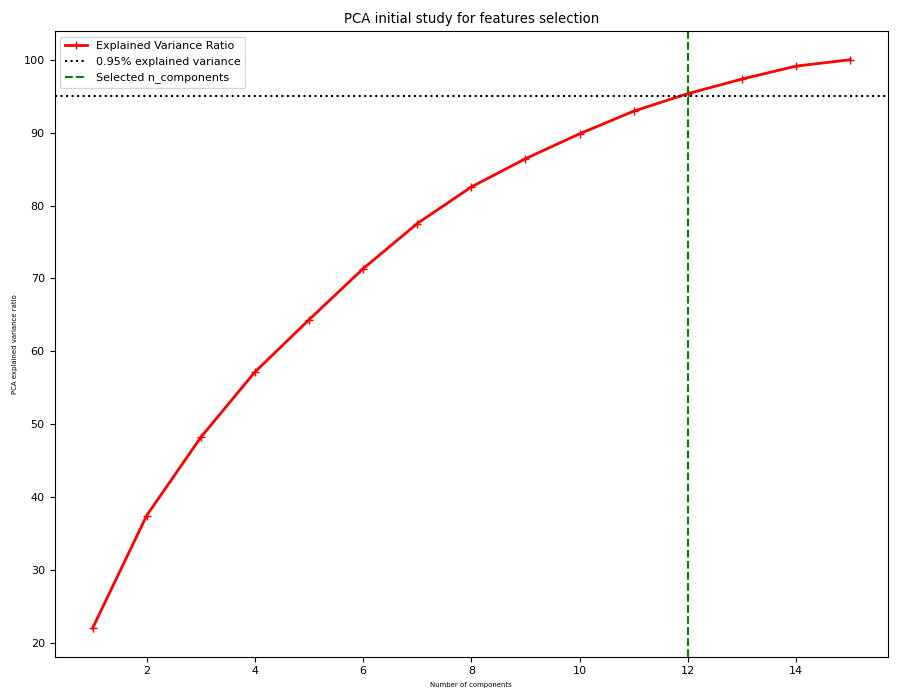

The number of selected features is: 12


In [668]:
### Perform a PCA study to determine the number of components that contain most of the variance of the data
normdata,labels,features,pca,vardf, nbest = Data_Cleaning_Functions.components_selection(data,features_list,True,"maxmin",True,"Zscore",3,True,"variance",0.95)

According to this graph, the PCA study determined that there were 12 main components between the initial 15 selected features that contained at least 95% of the variance of the data.  
>***Note:*** Due to the replacement of the NaN values by a randomly generated sample of data (aiming to keep constant the variance of the features), the results of the PCA study may vary from 12 to 13 components containing the 95% of the variance because sometimes with 12 components the ratio drops to around 94% and 13 are returned as a solution. Nevertheless, 12 components were deemed a good balance for the following analyses.

The obtained components were represented in a heatmap to also provide a visualization of the contribution of each feature on the different components:

<IPython.core.display.Javascript object>


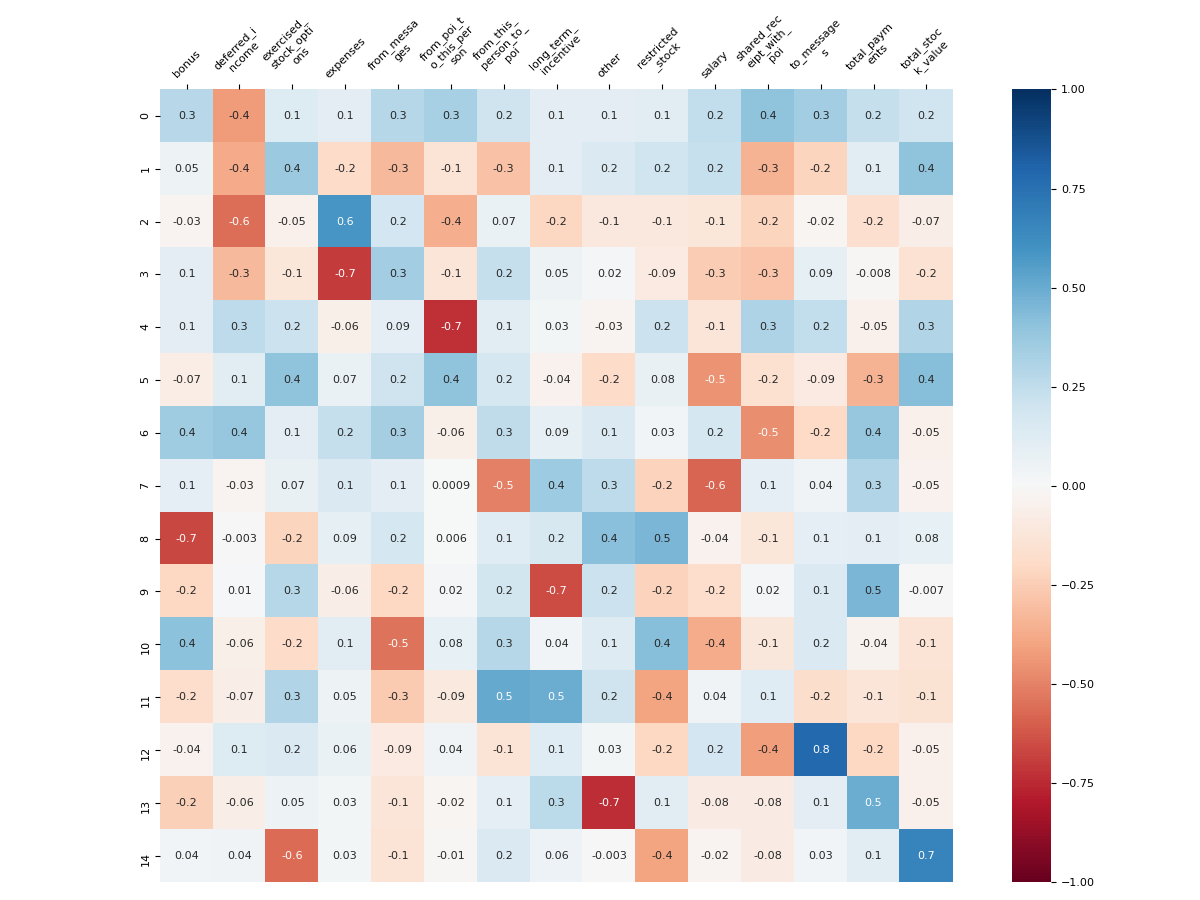

In [669]:
### Shows a Heatmap with the obtained components
Data_Cleaning_Functions.components_heatmap(vardf)

In order to select the 12 best components identified before, a "SelectKBest" method was used together with a "chi2" scoring method to determine which of the features seems more independent from the class and so, let's say more irrelevant for the classification.

<IPython.core.display.Javascript object>


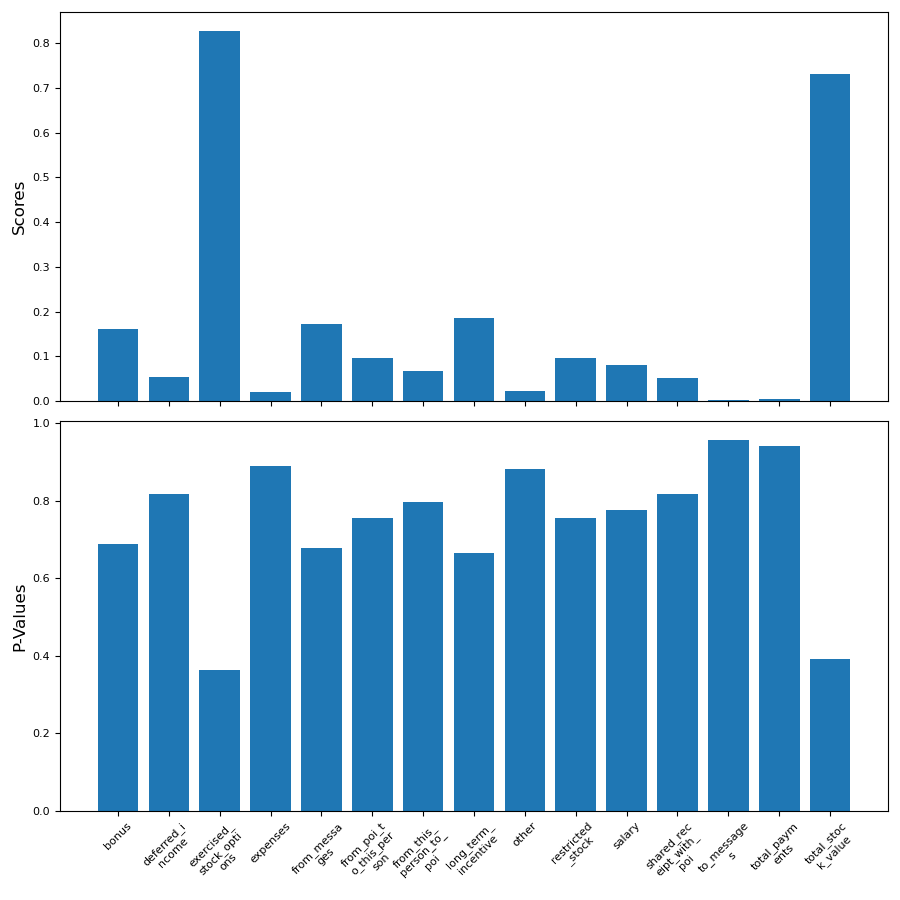

In [670]:
### Select the best features and transform the data into it
clean_data,new_features,features_selected = Data_Cleaning_Functions.best_features_selection('kbest', features_list[1:],normdata,
                                                                                 features,labels,nbest,showPlot=True)

In [671]:
### Show the final Selected features
print("The final features selected for the analysis were:")
pprint.pprint(features_selected)

The final features selected for the analysis were:
['bonus',
 'deferred_income',
 'exercised_stock_options',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'long_term_incentive',
 'other',
 'restricted_stock',
 'salary',
 'shared_receipt_with_poi',
 'total_stock_value']


Note that, despite 12 features were selected, according to the scores and p-values observed in the previous graphs, there are 3 features "exercised_stock_options", "from_this_poi_to_this_person" and "total_stock_value" that seem to be the features providing the best scores while some other resulted in very low values. Therefore, in case it is needed to reduce the number of features to just a few, such 3 features would be the suggestion to start looking at them and they could be selected using the SelectPercentile method as shown here below:

In [676]:
### Select the best features and transform the data into it
opt_data,opt_features,features_optimum = Data_Cleaning_Functions.best_features_selection('percentile', features_list[1:],
                                                                            normdata,features,labels,nbest=15,showPlot=False)
### Show the features giving the highest scores
print("The features that provide the highest scores are:")
pprint.pprint(features_optimum)

The features that provide the highest scores are:
['exercised_stock_options', 'long_term_incentive', 'total_stock_value']


The resultant cleaned dataset with the selected 12 features was again represented in a scatter_matrix to see the resultant shapes of the data and was saved as pickle file in a dictionary format (as the original dataset) as an input for the [Exploratory Data Analysis](#eda) section.

<IPython.core.display.Javascript object>


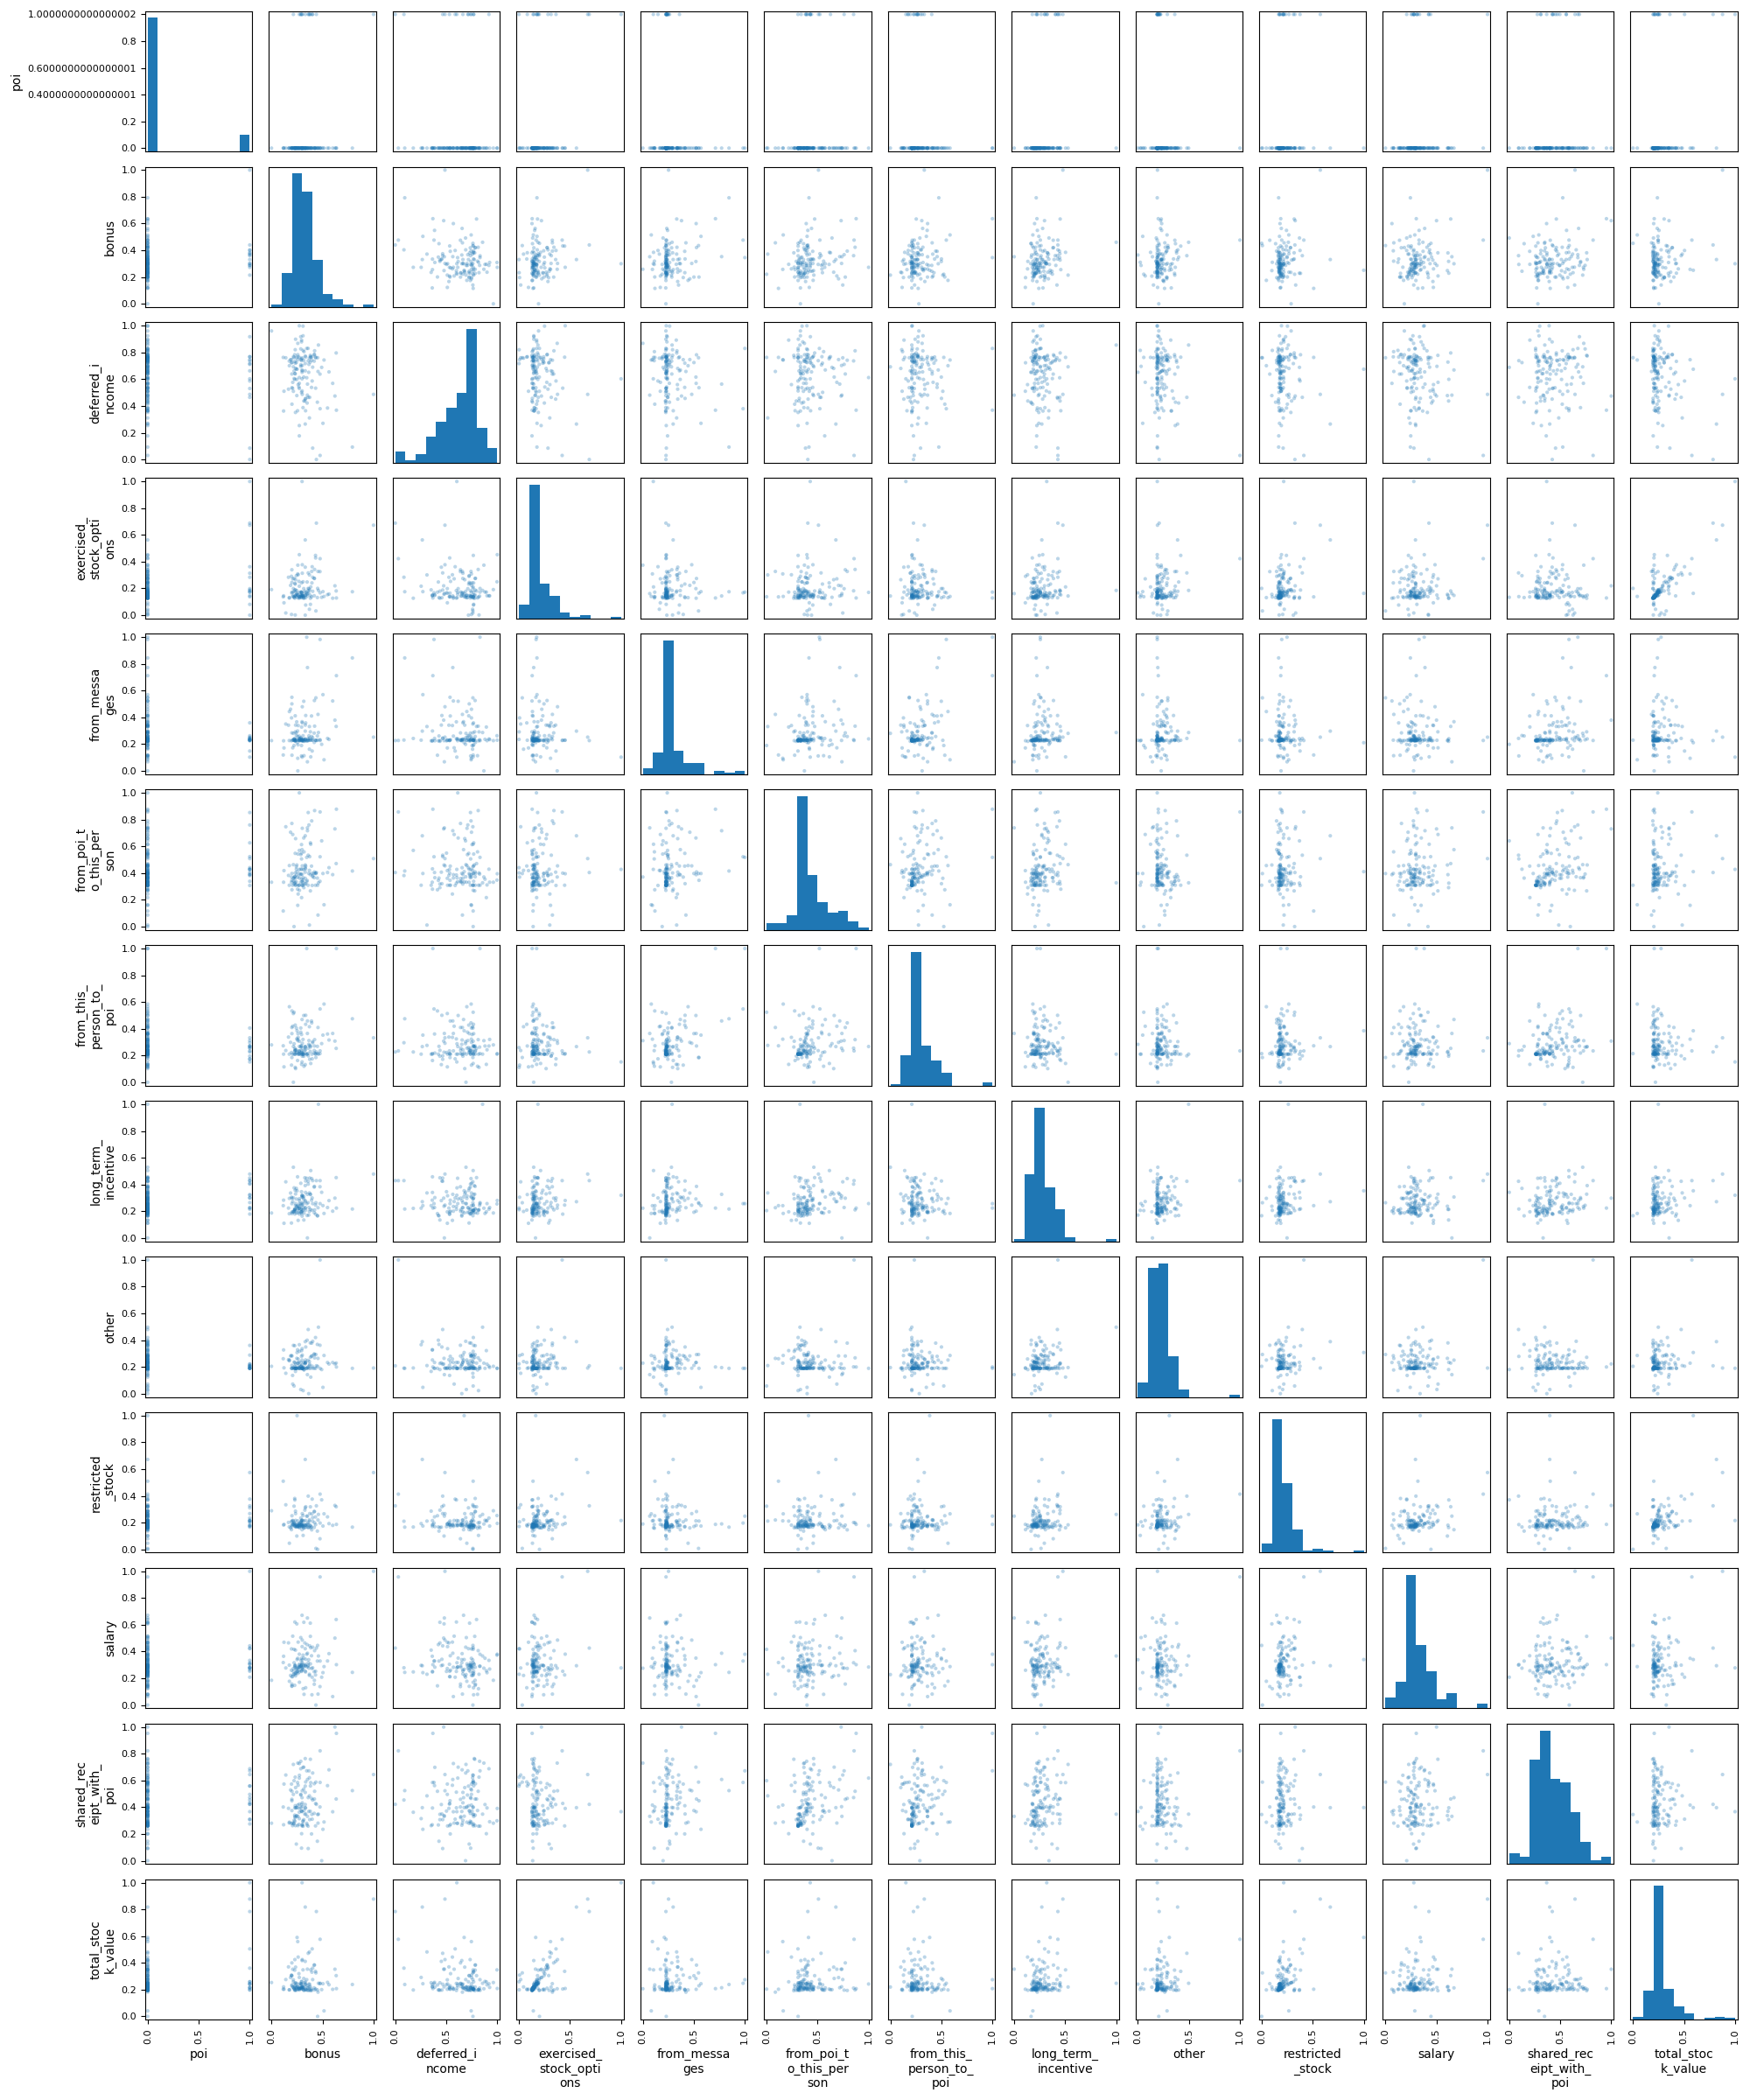

In [677]:
### Represent a scatter matrix for the selected features
Data_Cleaning_Functions.plot_scatter_matrix(clean_data,"maxmin",clean_data.columns)

In [678]:
### Save the cleaned data set into a pickle file
Data_Cleaning_Functions.save_cleaned_data(clean_data,"final_project_dataset_CLEANED.pkl")

Data succesfully saved.


***Summary of Data Cleaning Process:***

- "email_address" was not considered a feature and was not used for the analysis, thus the original dataset contained 19 features.
- The "TOTAL" entry containing the sum of all registers was removed from the dataset.
- Features with a percentage of NaN values higher than 70% were discarded ("deferral_payments", "director_fees", "loan_advances", "restricted_stock_deferred)
- Data points with a z-score (with regards to the feature statistics) higher than 3 were considered outliers and were discarded.
- Rows with only NaN values (apart from "poi") were disregarded. For the rest of data, NaN values were replaced by a randomly generated sample of data normally distributed according to the mean and the standard deviation of the feature, aiming to keep constant the variance of the feature itself. 
- An initial PCA study was conducted to determine the number of components that contain at least the 95% explained variance ratio of the data set, resulting in a minimum of 12 components.
- A SelectKBest method was used to select the 12 features that provided the best scoring according to a chi-squared statistic ("bonus", "deferred_income", "exercised_stock_options", "expenses", "from_messages", "from_poi_to_this_person", "from_this_person_to_poi", "long_term_incentive", "restricted_stock", "salary", "to_messages", "total_stock_value")
- Three of the features were identified as the highest scoring ones ("exercised_stock_options", "from_messages", "total_stock_value").
- The cleaned dataset to be used in the [Exploratory Data Analysis](#eda) section contain 137 registers and 12 features and was saved into a pickle file in a dictionary format.

## Exploratory Data Analysis<a id='eda'></a>

---
<a name='DE_SelTab'></a>
<button name="button"><a href="#DE_OB"><span style="color:blue">Objectives Revision</span></a></button> <button name="button"><a href="#DE_AR"><span style="color:blue">Analysis Results</span></a></button> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<button name="button"><a href="#intro"><span style="color:red">Back to Introduction</span></a></button> <button name="button"><a href="#wrangling"><span style="color:red">Back to Data Wrangling</span></a></button> <button name="button"><a href="#limitations"><span style="color:black">Forward to Limitations</span></a></button> <button name="button"><a href="#conclusions"><span style="color:black">Forward to Conclusions</span></a></button>

---

---

### Objectives Revision <a name='DE_OB'></a> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<button name="button"><a href="#eda"><span style="color:black">Up</span></a></button>

---

### Analysis Results & Data Visualization<a name='DE_AR'></a> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<button name="button"><a href="#eda"><span style="color:black">Up</span></a></button>

---

## Analysis Limitations<a name='limitations'></a>

---
<a name='DE_SelTab'></a>
<button name="button"><a href="#conclusions"><span style="color:blue">Conclusions</span></a></button> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<button name="button"><a href="#intro"><span style="color:red">Back to Introduction</span></a></button> <button name="button"><a href="#wrangling"><span style="color:red">Back to Data Wrangling</span></a></button> <button name="button"><a href="#eda"><span style="color:red">Back to Data Exploration</span></a></button> <button name="button"><a href="#conclusions"><span style="color:black">Forward to Conclusions</span></a></button>

---

---

## Analysis Conclusions<a name='conclusions'></a>

---
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<button name="button"><a href="#intro"><span style="color:red">Back to Introduction</span></a></button> <button name="button"><a href="#wrangling"><span style="color:red">Back to Data Wrangling</span></a></button> <button name="button"><a href="#eda"><span style="color:red">Back to Data Exploration</span></a></button> <button name="button"><a href="#limitations"><span style="color:red">Back to Limitations</span></a></button>

---